# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_price)

37873.4976


In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_price)

2252.92959


In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45448.20
The current value of your 5.3 ETH is $11940.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-06-09", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
df_ticker.tail()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2022-06-03 04:00:00+00:00  102.67  102.905  102.64  102.82  6561090   
2022-06-06 04:00:00+00:00  102.67  102.770  102.16  102.19  5143230   
2022-06-07 04:00:00+00:00  102.42  102.760  102.40  102.58  5466862   
2022-06-08 04:00:00+00:00  102.42  102.555  102.16  102.16  4150825   
2022-06-09 04:00:00+00:00  102.07  102.220  101.97  102.05  5420518   

                                                      SPY                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-06-03 04:00:00+00:00       19041  102.803378  412.41  414.040  409.5100   
2022-06-06 04:00:00+00:00       16946  102.296385  414.76  416.609  410.5523   
2022-06-07 04:00:00+00:00       19386  102.607676  408.13  416.220  407.6100   
2022-06-08 04:00:00+00:00       16537  102.340877  413.93  415.820  410.3800   
2022-06-09 04:00:00+00:00       17714  102.086353  409.36  411.740  401.4400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-03 04:00:00+00:00  410.61  71994109      577282  411.857196  
2022-06-06 04:00:00+00:00  411.79  56928037      469357  413.055176  
2022-06-07 04:00:00+00:00  415.74  57844987      479379  412.931894  
2022-06-08 04:00:00+00:00  411.22  64218432      503515  412.739237  
2022-06-09 04:00:00+00:00  401.44  85991523      577695  406.846494

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][-1]
spy_close_price = df_ticker["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.05
Current SPY closing price: $401.44


In [12]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20072.00
The current value of your 200 AGG shares is $20410.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
data = {"amount": [crypto, shares]}
asset_type = ["crypto", "shares"]
df_savings = pd.DataFrame(data, index = asset_type)

# Display savings DataFrame
display(df_savings)

amount
crypto  57388.723947
shares  40482.000000

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

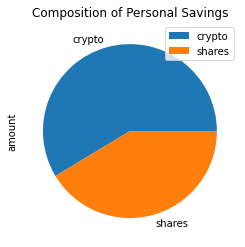

In [14]:
# Plot savings pie chart
df_savings.plot(kind = "pie", y = "amount", title = "Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your goal of having enough money in your emergency fund.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your goal of having enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-06-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-06-09', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-06-09 04:00:00+00:00  109.51  109.6300  109.46  109.56  1616833   
2017-06-12 04:00:00+00:00  109.51  109.6958  109.47  109.56  1394766   
2017-06-13 04:00:00+00:00  109.43  109.6000  109.43  109.59  1474335   
2017-06-14 04:00:00+00:00  110.00  110.1800  109.85  109.94  2627482   
2017-06-15 04:00:00+00:00  109.90  109.9000  109.78  109.87  2233855   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-06-09 04:00:00+00:00        8395  109.536583  244.07  245.01  241.9500   
2017-06-12 04:00:00+00:00        7701  109.566625  243.09  243.42  242.3800   
2017-06-13 04:00:00+00:00        8820  109.547545  243.98  244.61  243.5799   
2017-06-14 04:00:00+00:00       11057  110.024556  244.86  244.87  243.2900   
2017-06-15 04:00:00+00:00        8434  109.856463  242.69  243.91  242.3600   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-06-09 04:00:00+00:00  243.41  132256362      430463  243.643527  
2017-06-12 04:00:00+00:00  243.36   86108102      297488  243.061710  
2017-06-13 04:00:00+00:00  244.55   60066953      204224  244.127916  
2017-06-14 04:00:00+00:00  244.24   78602311      289788  244.221697  
2017-06-15 04:00:00+00:00  243.77   66464888      255022  243.318560

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-06-09 04:00:00+00:00  109.51  109.6300  109.46  109.56  1616833   
2017-06-12 04:00:00+00:00  109.51  109.6958  109.47  109.56  1394766   
2017-06-13 04:00:00+00:00  109.43  109.6000  109.43  109.59  1474335   
2017-06-14 04:00:00+00:00  110.00  110.1800  109.85  109.94  2627482   
2017-06-15 04:00:00+00:00  109.90  109.9000  109.78  109.87  2233855   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-09 04:00:00+00:00        8395  109.536583          NaN  244.07   
2017-06-12 04:00:00+00:00        7701  109.566625     0.000000  243.09   
2017-06-13 04:00:00+00:00        8820  109.547545     0.000274  243.98   
2017-06-14 04:00:00+00:00       11057  110.024556     0.003194  244.86   
2017-06-15 04:00:00+00:00        8434  109.856463    -0.000637  242.69   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2017-06-09 04:00:00+00:00  245.01  241.9500  243.41  132256362      430463   
2017-06-12 04:00:00+00:00  243.42  242.3800  243.36   86108102      297488   
2017-06-13 04:00:00+00:00  244.61  243.5799  244.55   60066953      204224   
2017-06-14 04:00:00+00:00  244.87  243.2900  244.24   78602311      289788   
2017-06-15 04:00:00+00:00  243.91  242.3600  243.77   66464888      255022   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-09 04:00:00+00:00  243.643527          NaN  
2017-06-12 04:00:00+00:00  243.061710    -0.000205  
2017-06-13 04:00:00+00:00  244.127916     0.004890  
2017-06-14 04:00:00+00:00  244.221697    -0.001268  
2017-06-15 04:00:00+00:00  243.318560    -0.001924

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\harri\OneDrive\Desktop\FinTech_Boot_Camp\Class Activities\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.994331  0.995110  1.003111  1.007586  0.992291  1.010114  1.009519   
2     0.988767  1.004202  0.999521  1.007837  1.001430  1.009244  1.018779   
3     0.987464  0.985635  0.996793  1.002718  0.983148  1.005681  1.033370   
4     0.989455  0.972908  0.987696  1.019530  0.991330  1.001966  1.030257   
...        ...       ...       ...       ...       ...       ...       ...   
7556  2.507588  3.936562  5.715884  2.199778  7.216493  8.486327  2.681185   
7557  2.508321  3.914572  5.705970  2.183259  7.117187  8.602391  2.671650   
7558  2.538263  3.887217  5.755908  2.203991  7.142524  8.607541  2.705941   
7559  2.504471  3.887240  5.751450  2.199284  7.208004  8.702129  2.713319   
7560  2.479850  3.905124  5.666221  2.219787  7.221506  8.697501  2.729854   

           7         8          9    ...       490       491       492  \
0     1.000000  1.000000   1.000000  ...  1.000000  1.000000  1.000000   
1     1.010470  0.995461   1.006481  ...  0.998324  0.994356  0.992990   
2     0.999408  0.989411   1.016130  ...  1.002553  0.991899  0.981731   
3     1.005379  0.987563   1.031960  ...  1.006341  0.986796  0.993931   
4     1.001227  0.973515   1.045312  ...  1.008668  0.969676  0.997898   
...        ...       ...        ...  ...       ...       ...       ...   
7556  3.538555  6.150350  15.442124  ...  5.615440  6.818265  5.580869   
7557  3.552653  6.161176  15.378072  ...  5.594911  6.893447  5.535633   
7558  3.531011  6.219989  15.373814  ...  5.628687  6.903221  5.542884   
7559  3.501936  6.217679  15.211673  ...  5.536063  6.855415  5.538553   
7560  3.493678  6.236878  15.286205  ...  5.488927  6.938191  5.576723   

           493       494       495       496       497       498        499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  
1     0.998831  1.004674  0.994825  0.989819  1.003764  0.991412   0.994400  
2     1.000715  1.012176  0.995409  0.994830  0.990740  0.994766   1.000814  
3     0.993907  1.022653  1.002238  0.980101  0.984188  0.988082   0.999177  
4     0.993795  1.019937  1.016540  0.980045  0.994148  0.992415   0.992777  
...        ...       ...       ...       ...       ...       ...        ...  
7556  5.580944  2.484474  4.575674  2.417874  8.360404  7.075418  24.204126  
7557  5.514670  2.509900  4.588232  2.440582  8.347438  7.172243  24.272971  
7558  5.581878  2.485518  4.594615  2.468529  8.427895  7.130731  24.414297  
7559  5.613041  2.487184  4.601368  2.456652  8.485034  7.210447  24.398075  
7560  5.573001  2.465585  4.562958  2.465185  8.467985  7.142786  24.488253  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

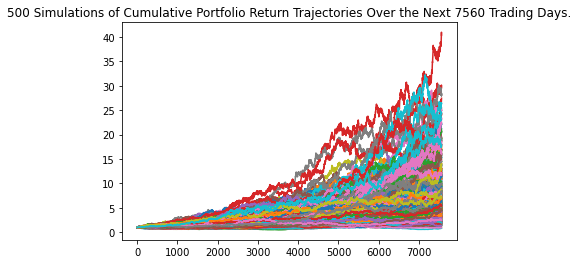

In [21]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

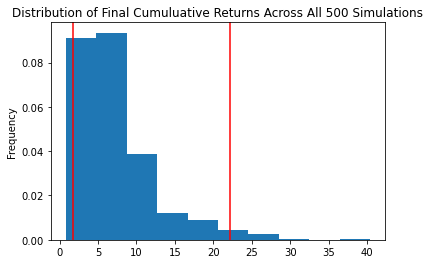

In [22]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.328230
std               5.171261
min               0.810705
25%               3.906407
50%               5.990228
75%               8.974700
max              40.393888
95% CI Lower      1.771392
95% CI Upper     22.130117
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $35427.84 and $442602.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $53141.77 and $663903.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\harri\OneDrive\Desktop\FinTech_Boot_Camp\Class Activities\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000409  1.002738  1.006388  0.988140  1.004978  1.007868  0.992633   
2     1.004388  0.993793  1.004273  0.986865  0.998120  1.012804  0.993436   
3     1.004326  0.985906  1.004094  0.979303  1.010044  1.014083  0.988502   
4     1.001632  0.990085  1.009884  0.976513  1.016168  1.013740  0.981115   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.209714  1.701386  1.897776  1.342887  2.554151  0.645783  1.779899   
1257  2.228094  1.708886  1.908619  1.348849  2.531234  0.646502  1.781675   
1258  2.204655  1.690206  1.903766  1.366397  2.531294  0.643077  1.759027   
1259  2.204380  1.673948  1.912162  1.350754  2.602598  0.640384  1.777883   
1260  2.192153  1.670667  1.895471  1.349120  2.595846  0.643218  1.766593   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006379  1.014345  0.996948  ...  0.992126  0.995822  1.010815   
2     1.012259  1.013857  0.994066  ...  0.992482  0.992884  1.011734   
3     1.015926  1.015017  0.988069  ...  0.982401  0.986433  1.002850   
4     1.007800  1.009832  0.992794  ...  0.983174  0.990054  1.004894   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.053177  0.991438  1.609913  ...  1.786822  0.640327  1.252213   
1257  1.048329  0.998831  1.607398  ...  1.776449  0.637498  1.236152   
1258  1.035286  1.005027  1.592836  ...  1.775796  0.640889  1.234741   
1259  1.042397  1.012608  1.586022  ...  1.792618  0.640833  1.222180   
1260  1.044694  1.018023  1.585222  ...  1.785164  0.640320  1.218235   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.992378  1.004991  1.012500  1.006718  1.010443  1.006943  1.005986  
2     0.994464  0.999599  1.032673  1.002074  1.007569  1.019460  0.999073  
3     1.005948  0.989186  1.032786  1.007309  1.013479  1.017612  0.995011  
4     1.004734  0.995941  1.032168  0.997555  1.013297  1.021441  0.994624  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.569331  1.381052  1.859316  1.108973  3.208399  1.515992  1.062093  
1257  1.575031  1.375935  1.851303  1.104639  3.166094  1.503757  1.057985  
1258  1.553878  1.359828  1.866782  1.096096  3.192496  1.519450  1.071332  
1259  1.539992  1.351961  1.849580  1.087732  3.232902  1.505836  1.062268  
1260  1.556417  1.366236  1.843438  1.094093  3.272655  1.509123  1.066572  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

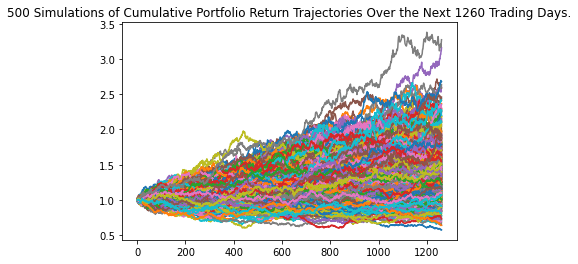

In [28]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

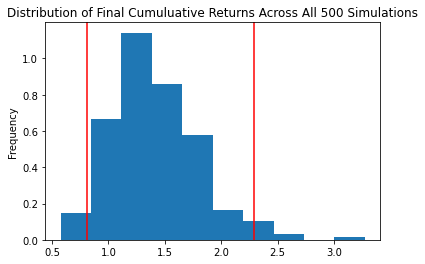

In [29]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.414616
std               0.390059
min               0.575031
25%               1.139704
50%               1.359143
75%               1.640204
max               3.272655
95% CI Lower      0.811202
95% CI Upper      2.289388
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8] * initial_investment, 2)
ci_upper_five = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48672.13 and $137363.26


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\harri\OneDrive\Desktop\FinTech_Boot_Camp\Class Activities\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007941  1.010966  1.002630  1.003556  1.000927  0.991877  1.001104   
2     0.998944  1.004275  1.014477  0.995519  0.998128  0.998463  0.998091   
3     0.995799  1.011636  1.011524  0.992109  0.986010  0.989519  0.997683   
4     0.995784  1.013230  1.025271  0.969931  0.983794  0.986339  0.992355   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.468287  1.847649  1.485803  1.450224  1.423722  1.673315  1.931266   
2517  3.514367  1.875109  1.487899  1.450094  1.413151  1.682052  1.932018   
2518  3.489611  1.875311  1.476418  1.445166  1.412667  1.668359  1.931335   
2519  3.535942  1.868876  1.471597  1.446573  1.414268  1.654650  1.931173   
2520  3.551264  1.858292  1.452513  1.445691  1.403745  1.677652  1.924249   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998818  1.017295  1.002865  ...  0.996012  1.005385  1.006709   
2     0.999741  1.025384  1.001615  ...  0.992460  1.006925  1.008294   
3     1.002865  1.023384  1.008165  ...  0.999893  1.011050  1.014280   
4     1.015965  1.017150  1.009141  ...  1.011150  1.011017  1.013701   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.358134  1.689047  1.733917  ...  1.785330  2.495026  2.853570   
2517  1.372692  1.712149  1.720294  ...  1.762182  2.485559  2.840072   
2518  1.357497  1.690672  1.709537  ...  1.751078  2.484546  2.799230   
2519  1.345273  1.681617  1.714132  ...  1.748105  2.456468  2.827395   
2520  1.353357  1.693169  1.722626  ...  1.754014  2.477170  2.842445   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009374  1.005528  1.001078  0.989715  1.003291  0.989285  1.003213  
2     1.022409  0.996765  1.009255  0.988449  1.014120  0.989222  1.006259  
3     1.027174  1.009072  0.996915  0.983929  1.016122  0.993955  1.005653  
4     1.031019  1.015271  0.991366  0.988593  1.015108  0.987809  1.001639  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.554680  1.573063  1.130759  1.645142  1.329887  1.310644  2.105225  
2517  1.574353  1.581458  1.115763  1.654163  1.343015  1.319821  2.088257  
2518  1.573793  1.585881  1.109418  1.662843  1.334604  1.314843  2.073962  
2519  1.586375  1.575092  1.112838  1.654302  1.334284  1.327408  2.086632  
2520  1.572967  1.582204  1.128599  1.634523  1.340201  1.337093  2.094567  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

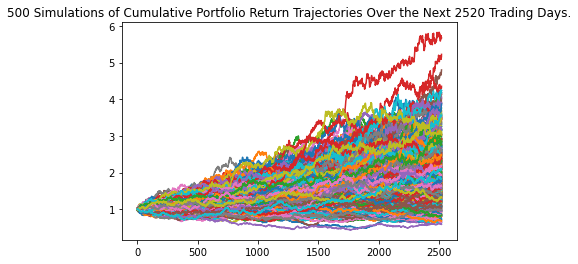

In [34]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

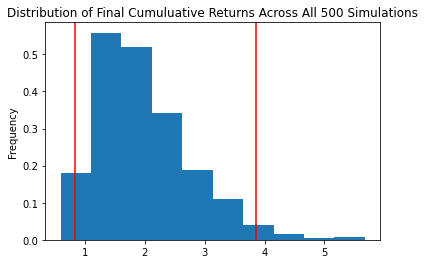

In [35]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.978639
std               0.789634
min               0.589341
25%               1.401917
50%               1.820209
75%               2.453874
max               5.676133
95% CI Lower      0.837337
95% CI Upper      3.859293
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8] * initial_investment, 2)
ci_upper_ten = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $50240.24 and $231557.57
